In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler as MN, StandardScaler as SS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib inline

In [94]:
#Import DATA into Pandas
df = pd.read_csv('credit_risk.csv')

In [95]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


#Drop/Remove Unique Identifier

In [96]:
df = df.drop(columns = ['Id'])

#Making Categorical variable into numbers

In [97]:
df = pd.get_dummies(df, columns = ['Home','Intent','Default'])

In [98]:
df.head()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1


#Superficial Heatmapof the correlation b/w elemets

<Axes: >

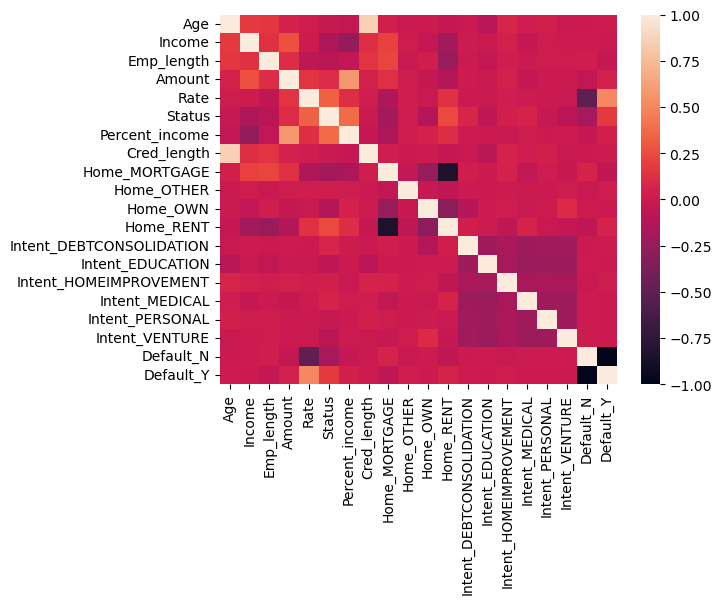

In [100]:
sns.heatmap(df.corr())

In [101]:
#Handling Missing values
imputer = SimpleImputer(strategy='median')

In [102]:
imp = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [103]:
#Train_test_Split
X = imp.drop(columns=['Status'], axis=1)
y = imp['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
#Normalizing data using MinMaxScaler
norm = MN().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [105]:
#Normalizing data using StandardScaler
stand = SS().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand =  stand.transform(X_test)

In [106]:
#Measuring Score/Tabel
#Creating Empty list of score
SVM = []
RandomForest = []
Logistic = []
GB = []
X_trains = [X_train, X_train_norm, X_train_stand]
X_tests =  [X_test, X_test_norm, X_test_stand]

In [107]:
#Creating Loop for traversing the X_trains & X_tests
for X_train_set, X_test_set in zip(X_trains, X_tests):
    svc = SVC()
    svc.fit(X_train_set,y_train)
    y_pred = svc.predict(X_test_set)
    SVM.append(accuracy_score(y_test, y_pred))
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train_set, y_train)
    y_pred = rf_classifier.predict(X_test_set)
    RandomForest.append(accuracy_score(y_test, y_pred))
    log = LR(solver='liblinear', random_state=0)
    log.fit(X_train_set,y_train)
    y_pred = log.predict(X_test_set)
    Logistic.append(accuracy_score(y_test, y_pred))
    gb_classifier = GradientBoostingClassifier()
    gb_classifier.fit(X_train_set, y_train)
    y_pred = gb_classifier.predict(X_test_set)
    GB.append(accuracy_score(y_test, y_pred))
pd.DataFrame({'SVM':SVM,'RandomForest':RandomForest,'Logistic':Logistic,'GradientBooster':GB},index = ['Orignal', 'Normalized', 'Standardised'])

,SVM,RandomForest,Logistic,GradientBooster
Orignal,0.802363,0.918367,0.814639,0.912383
Normalized,0.870339,0.918367,0.839190,0.912383
Standardised,0.883842,0.918367,0.838269,0.912383


    ##KEYTAKE-AWAYS
    #1. SVM - Highly Effected by scaling of components, as Evident in the accuracy-Scores.
    #2. RandomForest - No effect of scaling, as Evident by constant accuracy-Scores.
    #3. Logistic Regression - Effected by the Scaler but not very effective.
    #4. GradientBooster - Not Effected by the scaling of components.


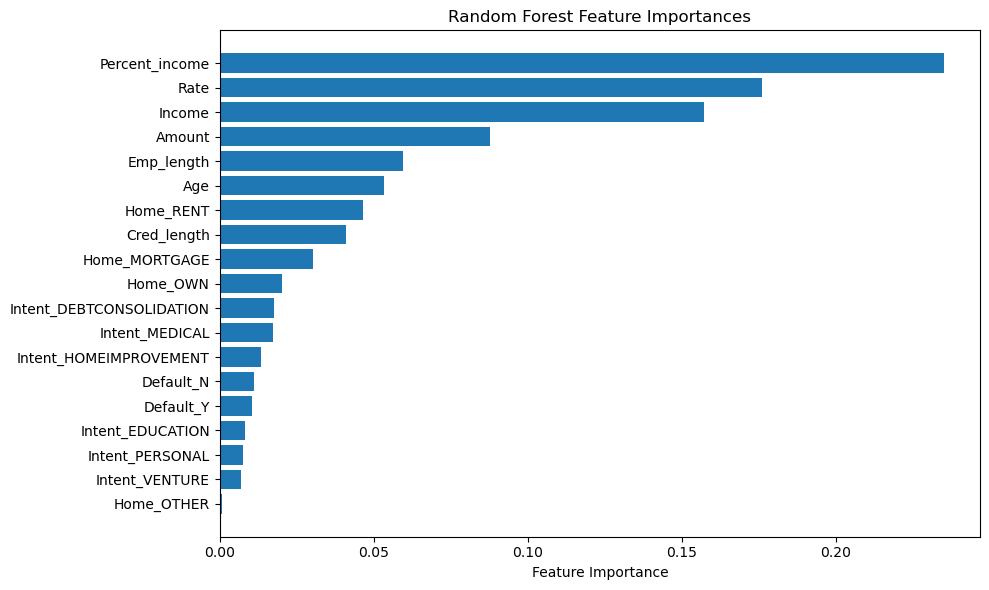

In [109]:
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

As can be seen above Random Forest shows some what confidence in top 4 Features.
But still comsiders that rest features are important

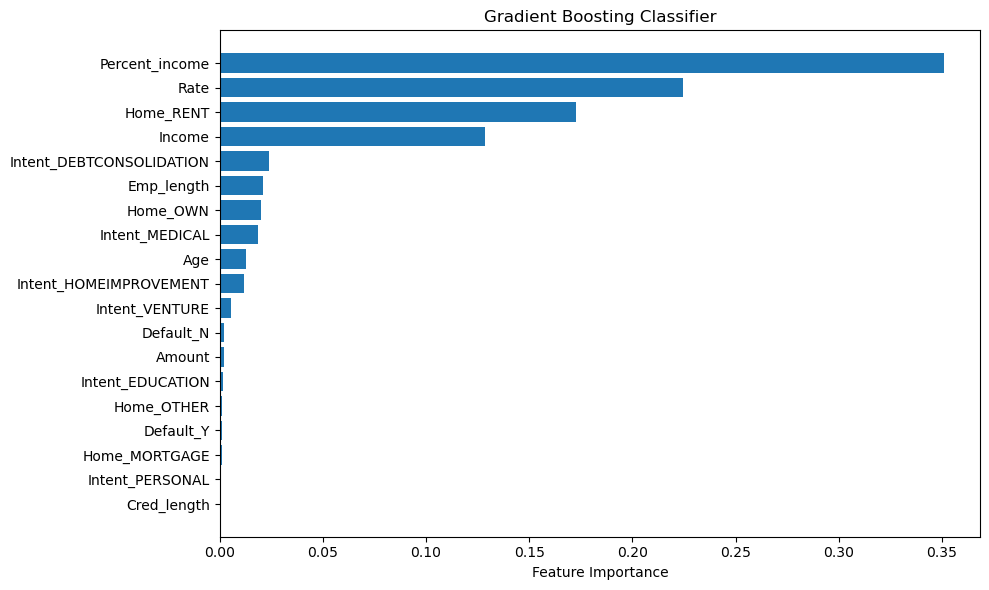

In [111]:
feature_importances = gb_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Classifier")
plt.tight_layout()
plt.show()

As evident in the fig above we can say that the top 4 parameters are the main deciding factors, Hence most confidence in the them.


Done By : - MOHIT KHARE